<h3>Debut de challenge 2 ,apres la derniere matrix de Correlation</h3>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#models libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score




In [2]:
df=pd.read_csv("data.csv")

In [ ]:
#df.head()
df.describe()
#df.info()
#df.columns

,Weight,Length1,Height,Width
count,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,8.970994,4.417486
std,357.978317,9.996441,4.286208,1.685804
min,0.000000,7.500000,1.728400,1.047600
25%,120.000000,19.050000,5.944800,3.385650
50%,273.000000,25.200000,7.786000,4.248500
75%,650.000000,32.700000,12.365900,5.584500
max,1650.000000,59.000000,18.957000,8.142000


In [ ]:
#df.isnull().sum()


In [ ]:
species_names=df["Species"].unique()
#species_names
#df["Species"]

In [ ]:
(df == 0).sum()


Species    0
Weight     1
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [ ]:
df[df['Weight'] == 0].groupby('Species').size().reindex(df['Species'].unique(), fill_value=0)


Species
Bream        0
Roach        1
Whitefish    0
Parkki       0
Perch        0
Pike         0
Smelt        0
dtype: int64

In [ ]:
roach_mean_weight = df[df['Species'] == 'Roach']['Weight'].mean()
df.loc[(df['Species'] == 'Roach') & (df['Weight'] == 0), 'Weight'] = roach_mean_weight


In [ ]:
#df[df['Weight'] == 0].groupby('Species').size()


In [ ]:
#(df == 0).sum()


<h4>pas d'autre zeros ! comme le roach a un zero dans le Weight ce qui n'est pas logique alors i replaced it with the mean of the Weight of the roach</h4>

In [ ]:
#df.groupby('Species')['Weight'].mean()

In [ ]:
df.select_dtypes(include='number').corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915986,0.918862,0.923333,0.724538,0.886959
Length1,0.915986,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918862,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923333,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724538,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886959,0.867050,0.873547,0.878520,0.792881,1.000000


<h5>
il y a une forte correlation entre le weight et le lenght3 (0.92), which can mean the fishes who are more heavy are most likely taller.
also the featues lenght2 et lenght3 sont tres correles entre eux almost =1 , so we can say that they give the same results !, so i consider dropping two and leave only one feature out of (Length1	Length2	Length3	).

    
</h5>

<Axes: xlabel='Species', ylabel='Weight'>

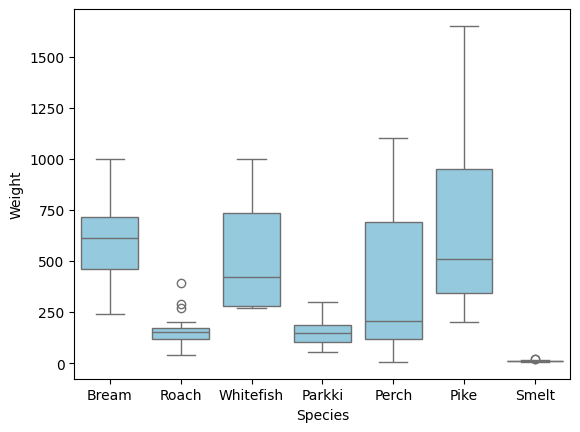

In [ ]:
sns.boxplot(x='Species', y='Weight', data=df,color='skyblue')

<h4>Du boxplot on peut voir la distrubution du feature weight par species , ce qui aide a comparer le weight selon species</h4>

<Axes: xlabel='Species', ylabel='count'>

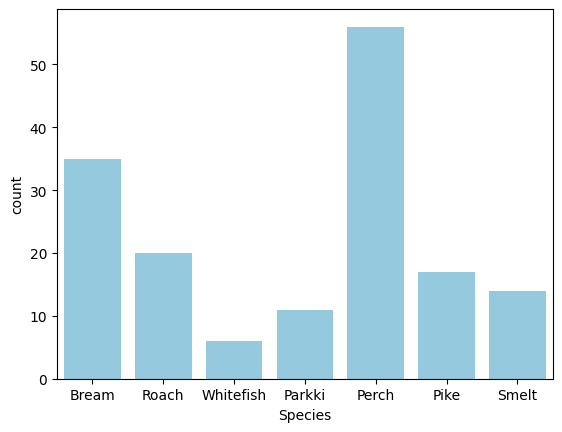

In [ ]:
sns.countplot(x='Species', data=df,color='skyblue')

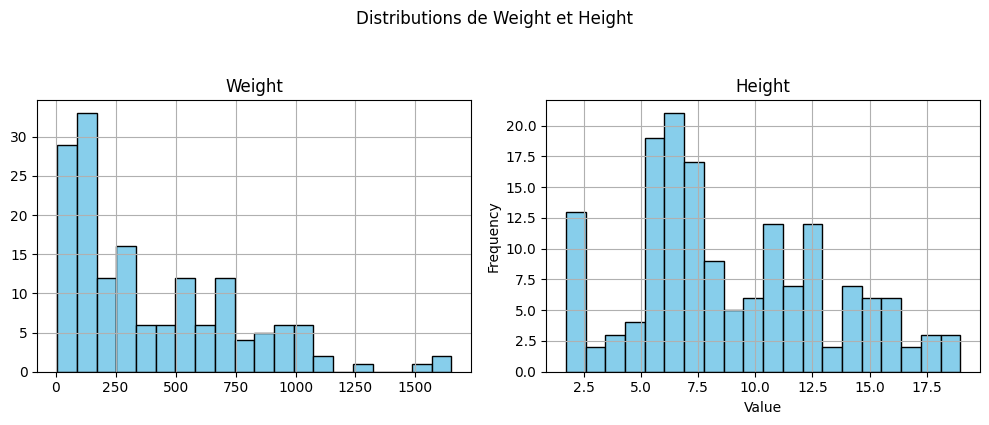

In [ ]:
df[['Weight', 'Height']].hist(bins=20, figsize=(10, 4), color='skyblue', edgecolor='black')
plt.suptitle("Distributions de Weight et Height", y=1.05)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

<h4>from this scatter plot we see the correlation between the weight and the lenght3</h4>

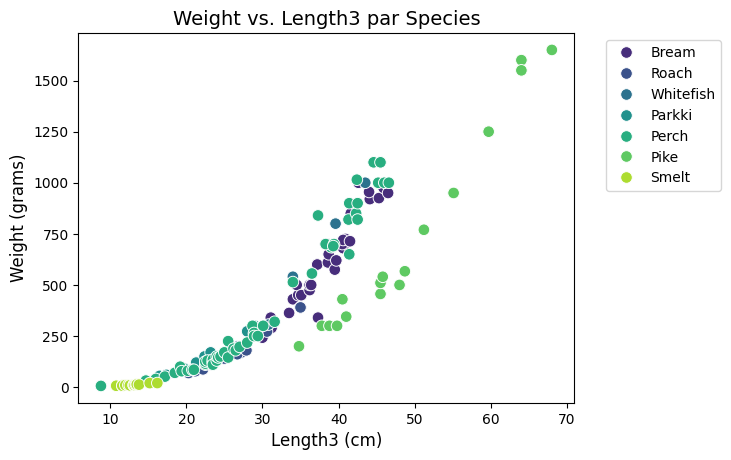

In [ ]:
sns.scatterplot(data=df, x='Length3', y='Weight', hue='Species', palette='viridis', s=70)
plt.title("Weight vs. Length3 par Species", fontsize=14)
plt.xlabel("Length3 (cm)", fontsize=12)
plt.ylabel("Weight (grams)", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<h4>Correlation entre Length1,Length2 et Length3 ce qui montre que they almost give the same information</h4>

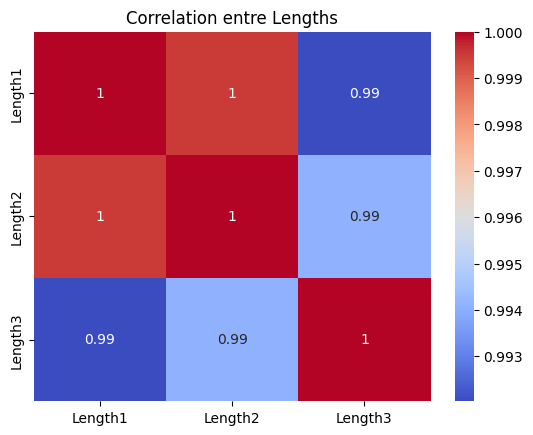

In [ ]:
sns.heatmap(df[['Length1', 'Length2', 'Length3']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation entre Lengths")
plt.show()


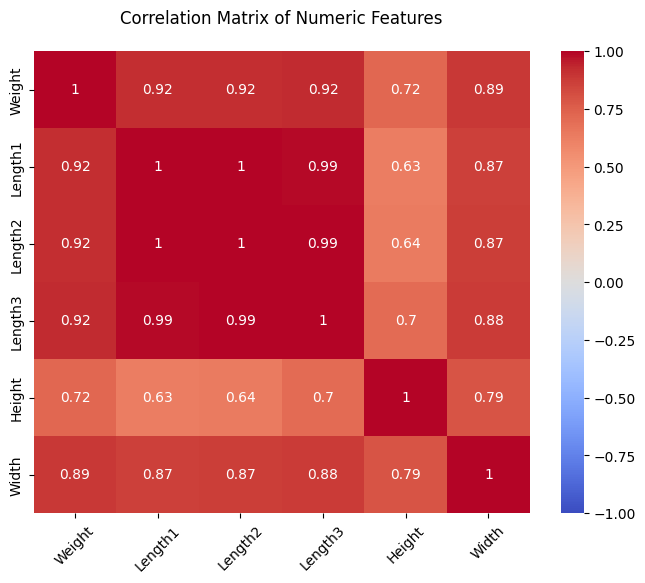

In [ ]:
# Include all numeric variables for broader insights
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numeric Features", pad=20)
plt.xticks(rotation=45)
plt.show()

<h3>Challenge Two linear Regression Models , Target = wieght</h3>

In [3]:
#drop lenght 1 and 2
df = df.drop(columns=['Length2', 'Length3'])
# Drop the 'Species' column
df = df.drop(columns=['Species'])

In [ ]:
df.columns

Index(['Weight', 'Length1', 'Height', 'Width'], dtype='object')

In [4]:
X = df.drop(columns=['Weight'])
y = df['Weight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
#train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#MAKE prediction
y_pred = model.predict(X_test)
# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 17324.618281351148
R-squared: 0.8782008918440809


In [7]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Evaluate
y_pred_poly = model_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Mean Squared Error: {mse_poly}")
print(f"Polynomial R-squared: {r2_poly}")

Polynomial Mean Squared Error: 3849.5459368592965
Polynomial R-squared: 0.9729361274055074


In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

cv_scores = -(cv_scores)

# Print the cross-validation results
print("Cross-validation scores (MSE): ", cv_scores)
print("Average MSE across folds: ", np.mean(cv_scores))

Cross-validation scores (MSE):  [ 7497.09887934  6852.58671215  4886.82625425 21133.649834
 65141.43290678]
Average MSE across folds:  21102.31891730649


In [8]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

#lasso
lasso = Lasso(max_iter=10000)
ridge = Ridge()
#le hyper parameteres
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Lasso regularization strengths
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Ridge regularization strengths

#recherhce grid lasso
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)

#ridge
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

#le mailleur model
best_lasso = lasso_grid.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Ridge
best_ridge = ridge_grid.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)



print("Lasso Regression:")
print(f"Best Alpha: {lasso_grid.best_params_['alpha']}")
print(f"Mean Squared Error: {mse_lasso}")
print(f"R-squared: {r2_lasso}\n")

print("Ridge Regression:")
print(f"Best Alpha: {ridge_grid.best_params_['alpha']}")
print(f"Mean Squared Error: {mse_ridge}")
print(f"R-squared: {r2_ridge}")

Lasso Regression:
Best Alpha: 0.01
Mean Squared Error: 17442.262228710373
R-squared: 0.8773738070774446

Ridge Regression:
Best Alpha: 0.01
Mean Squared Error: 17442.9361606154
R-squared: 0.8773690690622308


First, I applied a Linear Regression model, which gave a relatively high Mean Squared Error (MSE) and an R² of 87%.
Then, I transformed the features into polynomial features of degree 2, which improved the model significantly — the R² increased by 10%, reaching 97%, and the MSE dropped from 17,324 to 3,845.

To evaluate the generalization performance, I applied cross-validation, which showed signs of overfitting, with MSEs reaching up to 65,000 and an average MSE of 21,102:


Cross-validation scores (MSE):  
[ 7497.10  6852.59  4886.83 21133.65 65141.43 ]
This overfitting is likely due to the small dataset — only 160 samples.

I then tested Lasso and Ridge regression with all original features (including Length2 and Length3), and they gave almost the same results as the original Linear Regression model.
This confirms that the performance limitations are mainly caused by the small amount of data rather than irrelevant features.

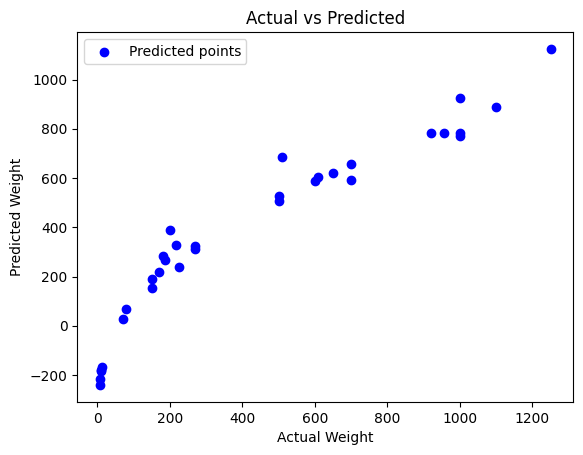

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue', label='Predicted points')


plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()
